In [2]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

## Check Preds

In [8]:
date = "2019-12-18"
mean = "ewma"
k = 50
tckr = "AMZN"
fpath = "./saved-outputs/" + tckr + "/"
fname = "volt_" + mean + str(k) + "_" + date + ".pt"

data = yf.download(tickers=tckr, period='10y', progress=False)
preds = torch.load(fpath + fname)
end_idx = np.where(data.index == pd.to_datetime(date))[0][0]
data = data.iloc[end_idx-200:end_idx]

In [4]:
train_x = torch.arange(data.shape[0])
test_x = torch.arange(preds.shape[1]) + train_x[-1] + 1

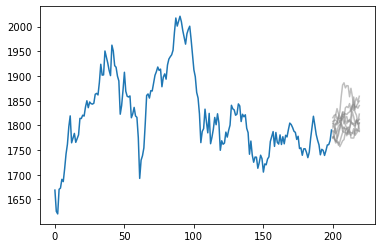

In [6]:
plt.plot(train_x, data.Close)
plt.plot(test_x, preds[:10, :].T.exp(), color='gray', alpha=0.5)
plt.show()